In [ ]:
# these are our usual libraries to do OLS
import pandas as pd
import statsmodels.api as sm

In [ ]:
# be sure to have the csv file collegeadmissions.csv in the same directory as this ipynb
df = pd.read_csv("datasets/collegeadmissions_subset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 71 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Name                                                                                    1109 non-null   object 
 1   Applicants total                                                                        1109 non-null   int64  
 2   Admissions total                                                                        1109 non-null   int64  
 3   Enrolled total                                                                          1109 non-null   int64  
 4   Percent of freshmen submitting SAT scores                                               1109 non-null   int64  
 5   Percent of freshmen submitting ACT scores                            

In [ ]:
df.corr()

,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,ACT Composite 25th percentile score,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
Applicants total,1.000000,0.851271,0.786554,0.189727,-0.115193,0.426376,0.390194,0.485452,0.481218,0.431267,...,-0.541859,-0.498578,-0.309436,-0.301781,-0.242234,-0.195357,-0.326489,-0.462238,-0.456822,-0.148195
Admissions total,0.851271,1.000000,0.883029,0.142660,-0.081639,0.230518,0.218460,0.300499,0.315094,0.246145,...,-0.397607,-0.417234,-0.261590,-0.251191,-0.252281,-0.125321,-0.313177,-0.343533,-0.334792,-0.105983
Enrolled total,0.786554,0.883029,1.000000,0.059168,0.004719,0.239110,0.234032,0.312964,0.330595,0.256166,...,-0.451871,-0.494381,-0.252975,-0.243196,-0.293759,-0.071245,-0.451118,-0.438859,-0.429317,-0.174731
Percent of freshmen submitting SAT scores,0.189727,0.142660,0.059168,1.000000,-0.893155,0.142382,0.056587,0.115646,0.055701,0.058220,...,-0.230619,-0.261271,-0.144461,-0.139032,-0.108330,-0.054554,-0.122641,-0.036301,-0.040072,0.085118
Percent of freshmen submitting ACT scores,-0.115193,-0.081639,0.004719,-0.893155,1.000000,-0.069922,0.023167,-0.044166,0.022355,0.009593,...,0.201322,0.241120,0.079038,0.070035,0.057933,0.063622,0.130532,-0.018076,-0.013843,-0.110610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Percent of freshmen receiving state/local grant aid,-0.195357,-0.125321,-0.071245,-0.054554,0.063622,-0.421616,-0.426691,-0.412488,-0.420836,-0.443646,...,0.387574,0.332894,0.514998,0.516962,0.110553,1.000000,-0.002111,0.226928,0.234875,-0.093302
Percent of freshmen receiving institutional grant aid,-0.326489,-0.313177,-0.451118,-0.122641,0.130532,-0.063194,-0.003963,-0.090022,-0.046898,-0.029853,...,0.625166,0.769689,-0.019307,-0.033032,0.279083,-0.002111,1.000000,0.415001,0.407204,0.293989
Percent of freshmen receiving student loan aid,-0.462238,-0.343533,-0.438859,-0.036301,-0.018076,-0.578045,-0.558639,-0.603837,-0.588453,-0.587413,...,0.675604,0.575142,0.470499,0.464453,0.399566,0.226928,0.415001,1.000000,0.995716,0.360066
Percent of freshmen receiving federal student loans,-0.456822,-0.334792,-0.429317,-0.040072,-0.013843,-0.590586,-0.569707,-0.615029,-0.599101,-0.598167,...,0.677151,0.575077,0.475014,0.471027,0.401369,0.234875,0.407204,0.995716,1.000000,0.334218


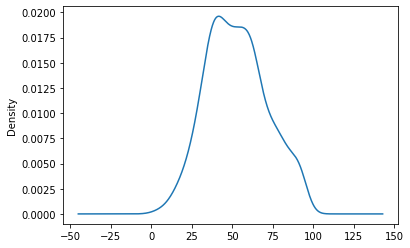

In [ ]:
# let's start with an understanding of the dependent variable
# Graduation rate - Bachelor degree within 5 years, total
df["Graduation rate - Bachelor degree within 5 years, total"].plot.kde()

In [ ]:
# here is a simple OLS
YVar = df[["Graduation rate - Bachelor degree within 5 years, total"]]
XVar = df[['Applicants total',
         'ACT Composite 75th percentile score']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
res = LinearModel.resid
print(LinearModel.summary())

                                               OLS Regression Results                                              
Dep. Variable:     Graduation rate - Bachelor degree within 5 years, total   R-squared:                       0.645
Model:                                                                 OLS   Adj. R-squared:                  0.644
Method:                                                      Least Squares   F-statistic:                     1000.
Date:                                                     Thu, 27 Oct 2022   Prob (F-statistic):          1.72e-248
Time:                                                             18:07:29   Log-Likelihood:                -4241.1
No. Observations:                                                     1106   AIC:                             8488.
Df Residuals:                                                         1103   BIC:                             8503.
Df Model:                                                               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
XVar.corr()

,const,Applicants total,ACT Composite 75th percentile score
const,NaN,NaN,NaN
Applicants total,NaN,1.000000,0.400772
ACT Composite 75th percentile score,NaN,0.400772,1.000000


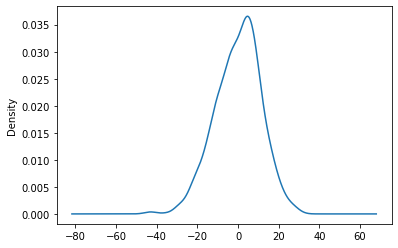

In [ ]:
# Let's plot the residuals to see how they are distributed
LinearModel.resid.plot.kde()

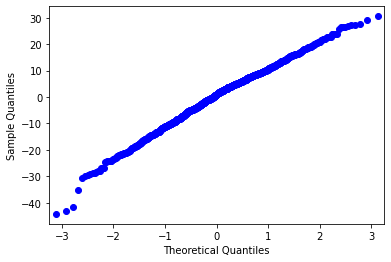

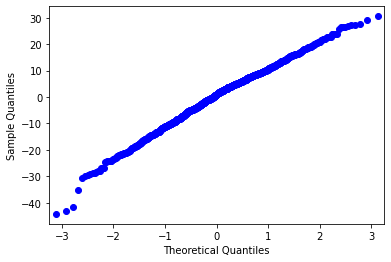

In [ ]:
sm.qqplot(res)